[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Episode : 100 | Reward -> 39.73 | Max reward : 86.0 | Time : 0.0
Episode : 200 | Reward -> 44.17 | Max reward : 101.0 | Time : 0.0
Episode : 300 | Reward -> 77.63 | Max reward : 165.0 | Time : 0.0
Solved in episode : 303 in time 0.0
Episode : 400 | Reward -> 87.25 | Max reward : 271.0 | Time : 0.0


MovieWriter imagemagick unavailable; using Pillow instead.


Episode : 500 | Reward -> 101.6 | Max reward : 343.0 | Time : 0.017246723175048828


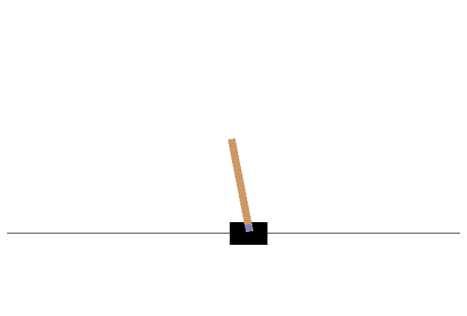

In [9]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# img = plt.imshow(env.render(mode='rgb_array')) # only call this once

# import libraries
import gym 
import numpy as np
import matplotlib.pyplot as plt
import time
# import pygame

# create environment 
env = gym.make('CartPole-v1')

# Define the Q table
state_space = 4 # number of states
action_space = 2 # number of possible actions

print(env.observation_space.low,"\n",env.observation_space.high)
def Qtable(state_space,action_space,bin_size = 30):
    

    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]

    q_table = np.random.uniform(low=-1,high=1,size=([bin_size] * state_space + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

def Q_learning(q_table, bins, episodes = 5000, gamma = 0.95, lr = 0.1, timestep = 50, epsilon =
0.2):
    rewards = 0
    solved = False
    steps = 0
    runs = [0]
    data = {'max' : [0], 'avg' : [0]}
    start = time.time()
    ep = [i for i in range(0,episodes + 1,timestep)]
#     frames = None

    for episode in range(1,episodes+1):

        current_state = Discrete(env.reset(),bins) # initial observation
        score = 0
        done = False
        temp_start = time.time()
        if episode%episodes == 0:
            frames = []

        while not done:
            steps += 1
            ep_start = time.time()
            
#                 env.render()

            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[current_state])

            if episode%episodes == 0: 
                frames.append(env.render(mode="rgb_array"))
            observation, reward, done, info = env.step(action)
            next_state = Discrete(observation,bins)

            score += reward


            if not done:
                max_future_q = np.max(q_table[next_state])
                current_q = q_table[current_state+(action,)]
                new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
                q_table[current_state+(action,)] = new_q

            current_state = next_state

        # End of the loop update
        else:
            rewards += score
            runs.append(score)
            if score > 195 and steps >= 100 and solved == False: # considered as a solved:
                solved = True
                print('Solved in episode : {} in time {}'.format(episode, (time.time()-ep_start)))

        # Timestep value update
        if episode%timestep == 0:
            print('Episode : {} | Reward -> {} | Max reward : {} | Time : {}'.format(episode,rewards/timestep, max(runs), time.time() - ep_start))
            data['max'].append(max(runs))
            data['avg'].append(rewards/timestep)
            if rewards/timestep >= 195:
                print('Solved in episode : {}'.format(episode))
            rewards, runs= 0, [0]

    # if len(ep) == len(data['max']):
    #     plt.plot(ep, data['max'], label = 'Max')
    #     plt.plot(ep, data['avg'], label = 'Avg')
    #     plt.xlabel('Episode')
    #     plt.ylabel('Reward')
    #     plt.legend(loc = "upper left")
    #     plt.show()
    return frames
#     env.close()

if __name__ == "__main__":
    q_table, bins = Qtable(len(env.observation_space.low), env.action_space.n)

    frames = Q_learning(q_table, bins, lr = 0.15, gamma = 0.995, episodes = 5*10**2, timestep = 100)
#     env.close()
#     time.wait
    save_frames_as_gif(frames)
    


In [ ]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
env = gym.make('CartPole-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [ ]:
env.close()

In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
import gym 

"""
Ensure you have imagemagick installed with 
sudo apt-get install imagemagick
Open file in CLI with:
xgd-open <filelname>
"""
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
#     import pdb; pdb.set_trace()
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

# #Make gym env
# env = gym.make('CartPole-v1')

# #Run the env
# observation = env.reset()
# frames = []
# for t in range(1000):
#     #Render to frames buffer
#     frames.append(env.render(mode="rgb_array"))
#     action = env.action_space.sample()
#     _, _, done, _ = env.step(action)
#     if done:
#         break
# env.close()
# save_frames_as_gif(frames)